# ADM - HW2 - Instagram Profiles & Posts

## Libraries & Setup

In [156]:
import pandas as pd   # Data manipulation and analysis

import matplotlib.pyplot as plt   # Visualization

from tqdm import tqdm   # Progress bar

from collections import Counter ## For keeping count

import functions as functions

In [3]:
profiles_df = pd.read_csv(r'C:\Users\PepeSa\Downloads\ADM\HMW2\instagram_profiles.zip', delimiter='\t', converters={"profile_id": str})
locations_df = pd.read_csv(r'C:\Users\PepeSa\Downloads\ADM\HMW2\instagram_locations.zip', delimiter='\t', converters={"id": str})

In [133]:
posts_reader = functions.initialize_posts_reader()

# Research questions

## [RQ1] *Exploratory Data Analysis (EDA)*

## [RQ2] *Insights regarding profiles and posts*

<h3>2.1 Profiles ordered by number of posts </h3>

In [148]:
# Remove NaN values from fields we are interest in
profiles_df = functions.adjustProfDf(profiles_df)

In [150]:
## Sorting profiles by number of posts in descending order, 
## so that the profile that posts the most will be displayed first
profiles_df = profiles_df.sort_values(by='n_posts', ascending=False)

In [151]:
profiles_df

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
3990313,3661552,199664772,jasem33312,jasem33312,NaN,2.0,82049.0,183730.0,NaN,2019-06-30 19:14:19.780 -0400,False
2571453,3288809,8563366588,koenigpic,Helperwait Studio,Веб сайты от идеи до запуска,4538.0,675.0,142428.0,vk.com/ru.helperwait,2019-05-07 00:14:06.799 -0400,True
4338921,3970193,1273455368,rudyanto62,Rudyanto 王耀祝,NaN,164.0,1693.0,126340.0,NaN,2019-07-15 10:00:51.171 -0400,False
3942129,3621669,9813508,hometown_ni,AngelsCowboysLakers,All about live & let live. Peace & Harmony. La...,7488.0,1755.0,125220.0,NaN,2019-06-27 02:49:38.140 -0400,False
4219642,3851869,1607309412,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...,7490.0,44951.0,117262.0,bit.ly/2GdIYJl,2019-07-13 02:10:07.317 -0400,True
...,...,...,...,...,...,...,...,...,...,...,...
4509575,4184448,243807285,not_omeed,أوميد,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:39:06.271 -0400,NaN
4509577,4184452,656779598,shak._n5,Shakil Hussain,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:39:23.911 -0400,NaN
4509582,4184469,13407035,jornvlaeminck,Jorn Vlaeminck,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:41.628 -0400,NaN
4509583,4184470,6007353778,s_degol,Sanne Degol,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:42.983 -0400,NaN


Plot of the first thirty profiles that post the most. As we can se, after the first two profiles, the number of posts start getting really similar between the profiles, even if keeps descending.

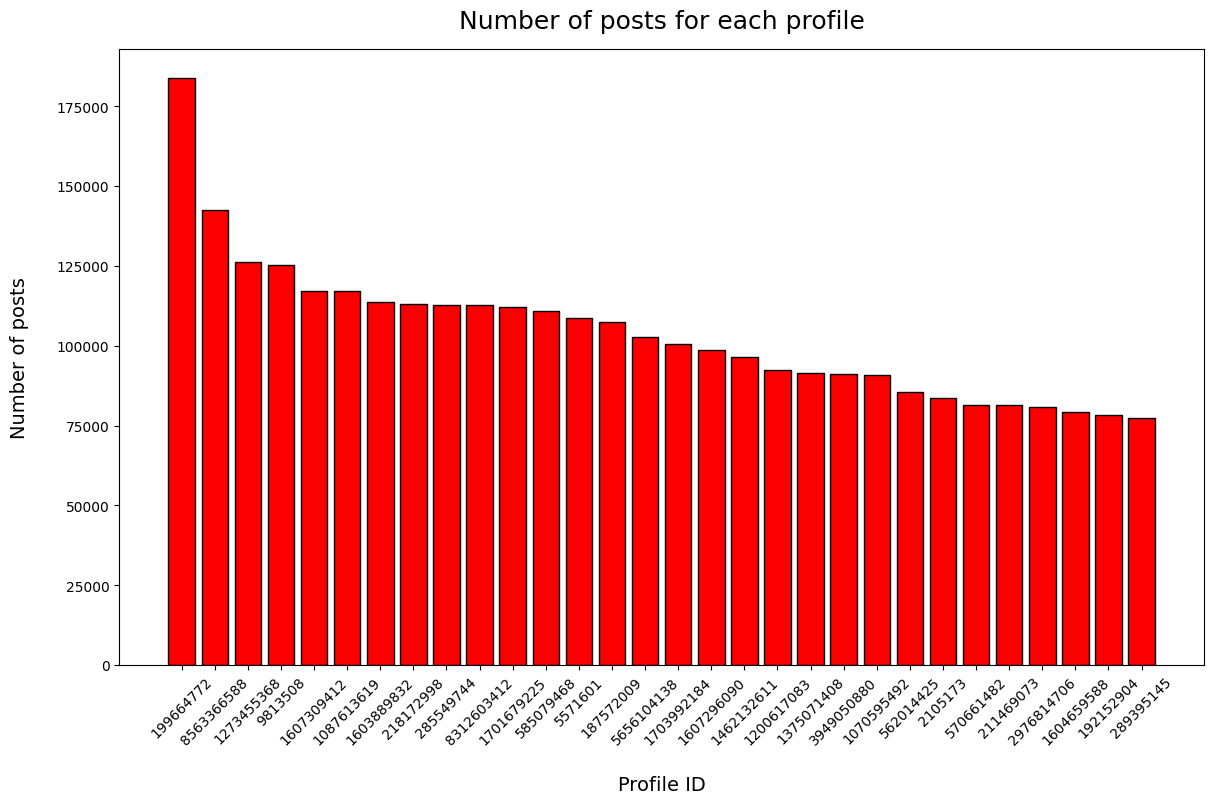

In [153]:
top_thirty = profiles_df.head(30)
functions.plot_n_posts(top_thirty)

<h3>2.2 Posts with the higher number of likes</h3>

In [154]:
# Read the posts data and compute all the info that we need 
infoDict = functions.computeCommentsLikesLocationAndType()
most_liked_posts = infoDict['mostLikedPosts']
most_commented_posts = infoDict['mostCommentedPosts']
least_commented_posts = infoDict['leastCommentedPosts']
type_counter = infoDict['typeCounter']
location_counter = infoDict['locationCounter']

In [8]:
# Compute the most liked posts over the final set. This is done by sorting
# in descending order the posts by number of likes.
most_liked_posts = most_liked_posts.sort_values(by='numbr_likes', ascending=False)
most_liked_posts

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
19624085,4768909,531404,Bt3yaXmAM0d,4.906778e+07,,2019-02-14 18:07:43.000,1,"You make me very happy. Happy Valentine’s Day,...",8822952.0,165886.0
19623988,4768904,531404,BuwffB7g8cK,4.906778e+07,,2019-03-08 18:39:02.000,1,I am so in awe of @colesprouse and @haleyluhoo...,5447066.0,25303.0
19624082,4768906,531404,Buc1gyZAaMQ,4.906778e+07,,2019-03-01 03:26:42.000,1,"Thinking of you, Luke. And praying for your sa...",5116398.0,40608.0
19623986,4768902,531404,BvcukE8AMuG,4.906778e+07,,2019-03-25 22:57:23.000,1,Hire us to perform at your sweet sixteen X,4271466.0,30770.0
39701024,25302472,470575,BqSLFVBFLfq,4.275539e+08,321418175024105.0,2018-11-17 14:57:59.000,1,NaN,4264745.0,18691.0
...,...,...,...,...,...,...,...,...,...,...
22266891,6572219,1250188,BvnMviwFRlC,3.587997e+06,214895019.0,2019-03-30 00:33:30.000,1,rolês improváveis: yoga com cabras #MinhaCalif...,39627.0,367.0
22429907,6735293,1207318,Bvg76TOhTyu,7.498841e+06,,2019-03-27 10:10:59.000,1,Thank you to my superstar team @bjpascual 📸 @r...,38953.0,97.0
22399538,6705111,1201765,BvBnwadAxGt,5.591062e+09,,2019-03-15 06:18:24.000,1,Rip fizzy you beautiful little soul x 🙏😞💫 x,38672.0,716.0
22041993,6347003,1139302,BtoUx5AgDkX,1.769455e+08,,2019-02-08 18:00:11.000,1,But how does it happen? Check out this stunnin...,37781.0,73.0


<h3>2.3 Posts with the highest and smallest number of comments</h3>

Posts with the highest number of comments. The post with the highest number of comments has 488953 comments.

In [9]:
# Compute the most commented posts over the final set by sorting them in descending order.
most_commented_posts = most_commented_posts.sort_values(by='number_comments', ascending=False)
most_commented_posts

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
41873060,27503892,-1,Bx2sPAjHviO,1.635670e+09,244000222.0,2019-05-24 20:00:04.000,1,Anne Oğul 🧡,38871.0,488953.0
12164781,39701672,3940995,BuGjhWAhAW5,4.282994e+08,,2019-02-20 12:46:12.000,1,When you scared to jump . Thats is exactly whe...,81523.0,313997.0
33261751,9952351,3335216,BJ-rkpTgn1N,5.533645e+07,375314645.0,2016-09-05 17:32:27.000,1,💋💋💋❤️,54507.0,257488.0
11149127,22594279,3831202,BMtisIxjhtT,5.697152e+06,277222335949200.0,2016-11-12 14:21:55.000,1,Кавайная я! 💕🌟☺️,331703.0,214365.0
9383817,37533033,3637382,BzOOWj3DfZK,1.062916e+09,,2019-06-27 19:54:33.000,1,💬 H E D İ Y E M İ Z VAR .\n. KAZANAN kişiye >...,23515.0,189888.0
...,...,...,...,...,...,...,...,...,...,...
23648115,7954871,2302795,Bv45C9yHHxs,1.782301e+08,,2019-04-05 17:27:43.000,1,Have you finished yet? ... Binging part 2 😏,145199.0,2517.0
19069247,4184132,692635,Bvc2rnPlIYo,1.922540e+09,1073274452813521.0,2019-03-26 00:09:51.000,1,We are partnering up with @chicklet.hf and @ma...,2602.0,2098.0
19065147,4179862,693331,BVWXwj7BJeC,5.397124e+09,,2017-06-15 06:06:25.000,1,森羅万象ににて紅葉に芸術に春夏秋冬に歌の練習\n駆け引きに音楽に芸術に基本的素敵な晩餐です\...,18152.0,1940.0
19069248,4184134,692635,BvcCs7ZFxHf,1.922540e+09,212988663.0,2019-03-25 16:34:07.000,1,We are partnering up with @chicklet.hf and @ma...,8190.0,1813.0


Posts with the smallest number of comments. The post with the smallest number of comments has 0 comments.

In [10]:
# Compute the least liked posts over the final set by ordering the DataFrame by number of comments,
# this time in ascending order since we want the smallest number of comments
least_commented_posts = least_commented_posts.sort_values(by = 'number_comments', ascending = True)
least_commented_posts

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2.237948e+09,1022366247837915.0,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80.0,0.0
28246768,12721525,1562826,Bvio_PvFC93,9.818463e+08,,2019-03-28 02:04:06.000,1,bibi💫,8.0,0.0
28246769,12721540,1562826,Bu_k7oLlFjJ,9.818463e+08,,2019-03-14 11:15:15.000,1,EMMMMMM,11.0,0.0
28246770,12724989,1563363,Bu83azpHRKl,1.743359e+09,,2019-03-13 09:59:04.000,1,NaN,13.0,0.0
28749999,13322257,1668133,Bb3Z94ZDuYD,9.830111e+08,,2017-11-24 06:09:01.000,1,Haha stole the phone 😊😊,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14687538,41907907,4313621,B0wcxUXBXTA,1.049341e+10,1386062.0,2019-08-04 23:23:41.000,1,Défilé sur le char pour les filles #feteafanfo...,10.0,0.0
14661711,41885020,4310276,BtaE54Yh0hV,1.012397e+10,330597027.0,2019-02-03 06:12:05.000,1,I think that this picture is beautiful in blac...,11.0,0.0
14661712,41885022,4310276,BtaESMwBBKb,1.012397e+10,330597027.0,2019-02-03 06:06:40.000,1,All that you see in that is dead will be live ...,13.0,0.0
14812261,42017371,4328793,Bw4WmXRBb-M,1.959402e+08,374193518.0,2019-04-30 14:58:07.000,1,Places I’d rather be @baigent1992 ☀️#Palma #Ma...,25.0,0.0


<h3>2.4 Number of posts with or without tagget location </h3>

Based on the sample we have, we can say that almost one third of the posts have registered location.

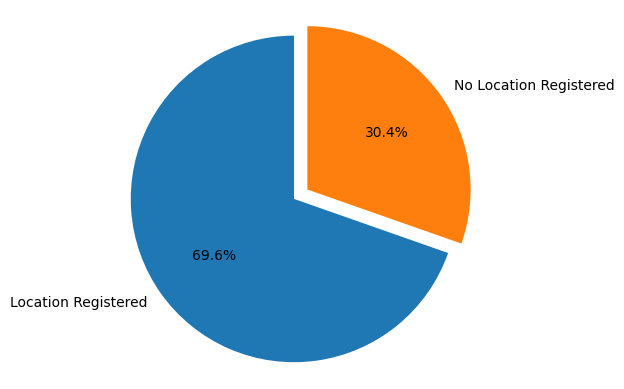

In [134]:
#Given location values computed earlier, we compute a pie chart using matplotlib.pyplot built in tools.
functions.plot_location_registered(location_counter)

<h3>2.5 Number of only-photo posts and mixed posts</h3>

As we can see from the analysis of our sample, the number of photos-only posts is more than a thousand times bigger than the mixed posts.

In [161]:
## Printing the number of only-photo posts and mixed posts

print('Only photo posts {}.'.format(type_counter['1']))
print('Mixed (videos and photos) posts {}.'.format(type_counter['3']))


Only photo posts 41534486.
Mixed (videos and photos) posts 40943.


<h3>2.6 Business accounts vs Non-Business Accounts</h3>

This time, for NaN values, we did not assume a default value. Hence, we can see that our dataset has a pretty big percentage of missing values for the 'is business account' field.
Nevertheless, we can see that the percentage of non-business accounts is much bigger than the business-accounts' one.

Business accounts are 18.9652% of the total
Non-Business accounts are 57.4347% of the total
NaN-Business accounts are 23.6% of the total


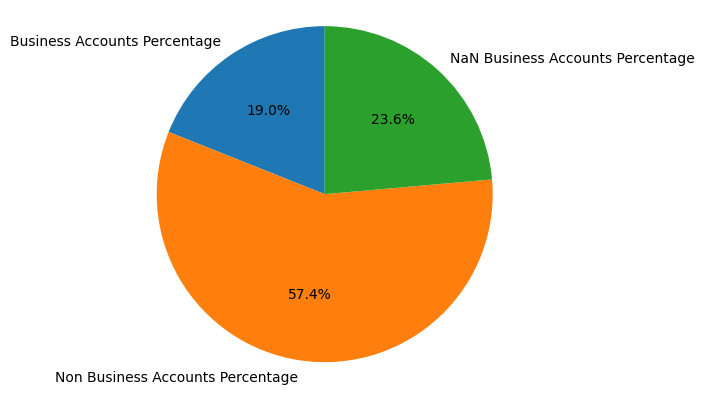

In [158]:
business_perc, non_business_perc, NaN_business_perc, business_perc_withoutNaN, non_business_perc_withoutNaN = functions.getBusinessAccountPercentage(profiles_df)

## Printing the percentage of business account vs the percentage non-business account 
## vs the percentage of accounts for which we do not know this value

print('Business accounts are {}% of the total'.format(business_perc))
print('Non-Business accounts are {}% of the total'.format(non_business_perc))
print('NaN-Business accounts are {}% of the total'.format(NaN_business_perc))

functions.plot_business_accounts_withNaN(business_perc, non_business_perc, NaN_business_perc)

This becomes more clear here. This times, we did not take into account NaN values and only plotted the business accounts percentage vs non-business accounts percentage. 
From this chart, we can see that, in our sample, business accounts are a fourth of the total. This makes sense if you think that Instagram was born as a platform mainly addressed to individuals.

Business accounts are 24.8236% of the total
Non-Business accounts are 75.1764% of the total


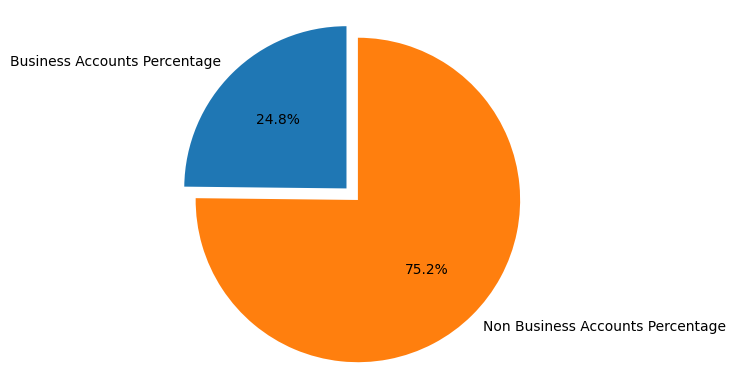

In [159]:
## Printing the percentage of business account vs the percentage non-business account 
## The percentage is calculated on number of accounts - number of accounts with 'is_business_account' = NaN

print('Business accounts are {}% of the total'.format(business_perc_withoutNaN))
print('Non-Business accounts are {}% of the total'.format(non_business_perc_withoutNaN))

functions.plot_business_accounts_withoutNaN(business_perc_withoutNaN, non_business_perc_withoutNaN)

## [RQ3] *Temporal analysis of publishing behavior*

## [RQ5]  *The most influential users*

<h3>5.1 The most ten popolar users in term of followers</h3>

In [125]:
## Sorting users by number of follwoer in descending order, 
## so that at first position we will have the one with most follower (the most influential)
profiles_df = profiles_df.sort_values(by='followers', ascending=False)

In [126]:
# Print the 10 most influential users
profiles_df.head(n=10)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,25025320,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False
2582507,371414,3416684,victoriassecret,Victoria's Secret,Confidence is sexy. #wearitdaily,549.0,65269440.0,7355.0,like2b.uy/victoriassecret,NaN,True
3820939,337097,20824486,nba,NBA,"30 teams, 1 🏆\n👟: @nbakicks \n📽: @nbahistory \...",817.0,35339708.0,28816.0,nba.app.link/js6X7SVaxT,NaN,True
701965,330376,187619120,louisvuitton,Louis Vuitton Official,The official Instagram account of Louis Vuitton.,5.0,30689316.0,3352.0,on.louisvuitton.com/Like2Buy,NaN,True
2414951,292359,2125506698,buzzfeedtasty,Tasty,"Recipes that will make you say ""oh yes!""\n👇 Cl...",298.0,30246783.0,2791.0,tasty.co/linkinbio,NaN,True
2785241,3437294,496865116,andresiniesta8,Andres Iniesta,"Andres Iniesta Official Instagram Account, \nB...",151.0,29542143.0,990.0,mikakus.com,2019-05-08 23:54:35.377 -0400,False
333193,158690,23410080,hm,H&M,Welcome to #HM! Follow us at @HM_Man @HM_Kids ...,403.0,29176804.0,4566.0,hm.info/1c9he,2018-05-31 19:33:46.022 -0400,True
3934581,3615154,24239929,princessyahrini,Syahrini,NaN,835.0,29042823.0,4719.0,www.youtube.com/c/ThePrincesSyahrini,2019-06-26 15:05:53.411 -0400,True
1311970,508140,50417061,danbilzerian,Dan Bilzerian,Snapchat: dbilzerian,252.0,26476004.0,1311.0,www.ignite.co,NaN,True
1703764,3513205,907025384,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False


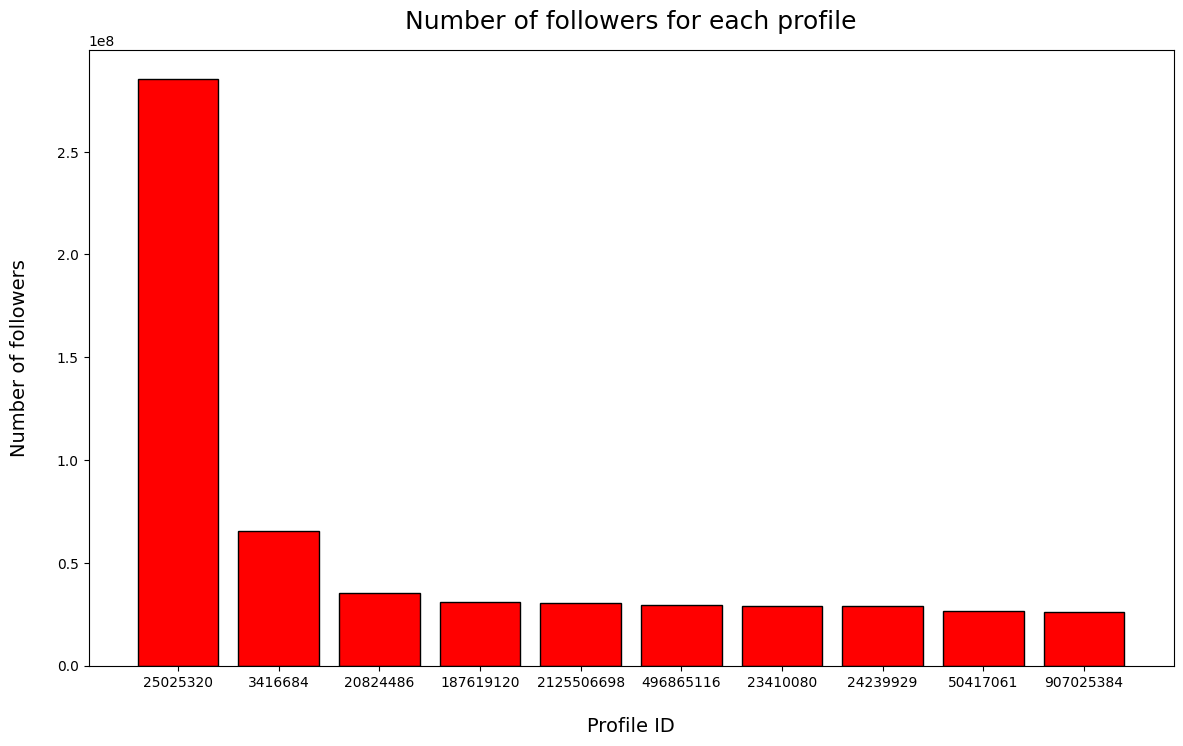

In [128]:
first_ten = profiles_df.head(10)
functions.plot_n_followers(first_ten)

<h4>5.1 The most ten popolar users's number of posts</h4>

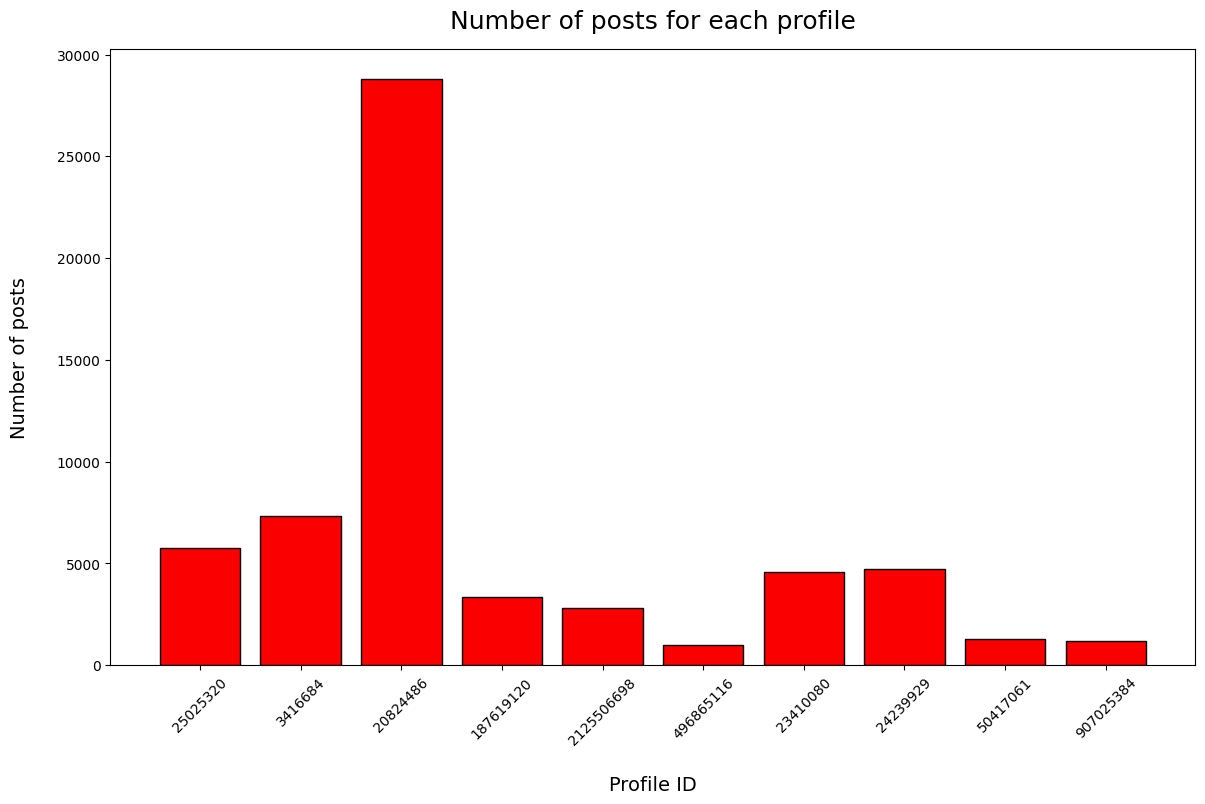

In [129]:
first_ten = profiles_df.head(10)
functions.plot_n_posts(first_ten)

<h3>5.2 The most influential user is Instagram itself</h3>

In [130]:
profiles_df.head(n=1)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,25025320,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False


<h3>5.3 The most frequent areas on their posts and the times that every location has been visited</h3>

In [131]:
#Get the most influential user's id, number of posts and followers
# The most influential user will be on top since the DataFrame is sorted
inf_n_posts = profiles_df['n_posts'].iat[0]
inf_profile_id = profiles_df['profile_id'].iat[0]
inf_followers = profiles_df['followers'].iat[0]

In [134]:
inf_posts = functions.inf_posts(posts_reader,inf_profile_id, inf_n_posts)

In [138]:
## Here we take the column 'location_id' and, with the use of a Counter,
## we count the occurences of every location Instagram registered in, so we can take
## the most ones
location_cnt = Counter(inf_posts.loc[:,'location_id'])
most_location_id = location_cnt.most_common(10)

As we can see here, we don't have a location that comes up more than once

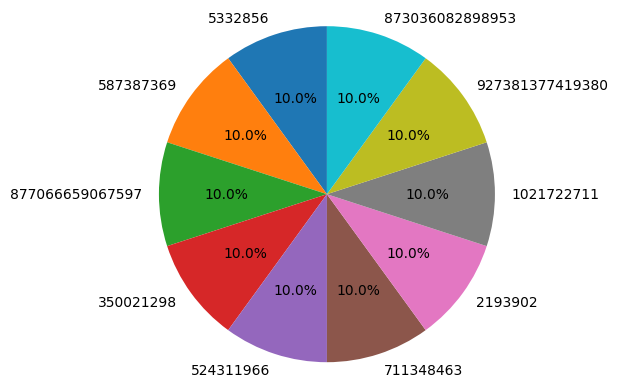

In [139]:
functions.plot_most_visited_locations(most_location_id)

In [140]:
## We only keep the ids since we only need them to filter locations
most_visited_locations = functions.getMostVisitedLocations([loc_id for loc_id,times in most_location_id], locations_df)

In [141]:
## Most visited locations details
most_visited_locations.to_html(formatters={'Name': lambda x: '<b>' + x + '</b>'})
most_visited_locations

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
45930,762145,5332856,Rosa Parks Plaza,250 N Lamar St,75202,"Dallas, Texas",NaN,US,(214) 979-1111,False,...,Downtown Dallas,downtown-dallas,US,United States,-96.804370,32.780616,NaN,rosa-parks-plaza,NaN,2019-05-30 21:26:01.789
60533,775485,587387369,Ethiopian Highlands,NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,38.166667,10.000000,NaN,ethiopian-highlands,NaN,2019-05-31 11:22:21.183
96048,804342,877066659067597,Machu Picchu,Machu Picchu,NaN,"Cusco, Peru",NaN,PE,NaN,False,...,Mondor Pampa Aserradero,mondor-pampa-aserradero,PE,Peru,-72.545428,-13.164656,MachuPicchuWonderOfTheWorld,machu-picchu,NaN,2019-06-01 16:12:10.227
136417,838341,350021298,Parkland County,NaN,NaN,"Stony Plain, Alberta",NaN,CA,+1 780-968-8445,False,...,NaN,NaN,NaN,NaN,-114.006000,53.530000,NaN,parkland-county,http://www.parklandcounty.com,2019-06-03 04:41:24.810
573108,891690,2193902,Porto Vecchio,Rue De La Citadelle,20137,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,porto-vecchio,NaN,2019-06-06 05:51:26.121
594752,916365,1021722711,Falla Maestro Gozalbo - Conde de Altea,"Calle Conde Altea, 5",46005,Valencia,NaN,ES,+34 963 95 39 24,False,...,Valencia,valencia,ES,Spain,-0.369870,39.465309,fallamaestrogozalbo,falla-maestro-gozalbo-conde-de-altea,http://www.fallamaestrogozalbo.com/,2019-06-07 06:13:12.712
626047,951387,927381377419380,Novi Sad Serbia,Руменачки пут,21000,"Novi Sad, Serbia",NaN,RS,NaN,False,...,NaN,NaN,NaN,NaN,19.836900,45.251700,NaN,novi-sad-serbia,https://novisad.com,2019-06-08 15:38:40.302
650437,976713,873036082898953,Mt Kosciuszko,Kosciuszko Summit Walk,2627,Kosciuszko,NaN,AU,NaN,False,...,NaN,NaN,NaN,NaN,148.263975,-36.456525,NaN,mt-kosciuszko,http://www.nationalparks.nsw.gov.au/visit-a-pa...,2019-06-09 17:25:36.519
844688,553843,524311966,Brodie Castle,Off A96,IV36 2TE,Forres,NaN,GB,01309 641371,False,...,NaN,NaN,NaN,NaN,-3.708948,57.598415,BrodieCastleNTS,brodie-castle,http://www.nts.org.uk/Property/Brodie-Castle/,2019-05-20 06:54:27.693
845415,554622,711348463,Hadleigh Park,Chapel Lane,SS7 2PP,"Hadleigh, Essex",NaN,GB,01702 551072,False,...,St. James,st-james,GB,United Kingdom,0.595682,51.551175,HadleighPark,hadleigh-park,http://www.hadleigh-park.co.uk,2019-05-20 08:10:11.138


<h3>5.4 Number of picture only posts, video only posts e mixed posts </h3>

In [142]:
##Count the number of post for each type and the number of like for each type of post
resultDict = functions.countLikeAndCommentForPostType(inf_posts)
post_type_counter = resultDict['PostTypeCounter']
like_by_type = resultDict['LikeByType']
comments_by_type = resultDict['CommentsByType']

Based on the small posts sample we have, we can say that around 91,18% of Instagram's posts are just photos, the rest are videos only posts and he never posts mixed posts.

Post containing only photos: 91.1765%
Post containing only videos: 8.8235%
Post containing both: 0.0%


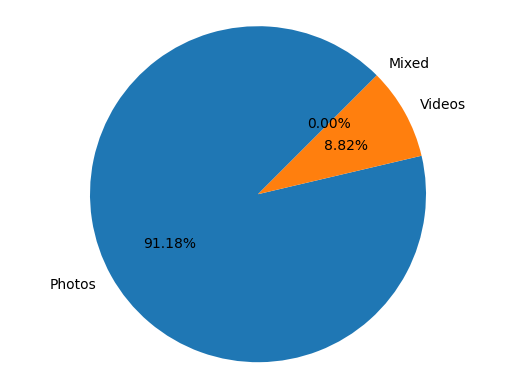

In [143]:
photo_percentage, video_percentage, multy_percentage = functions.calculatePostTypePercentage(post_type_counter, len(inf_posts))

print('Post containing only photos: {}%'.format(photo_percentage))
print('Post containing only videos: {}%'.format(video_percentage))
print('Post containing both: {}%'.format(multy_percentage))

functions.plot_post_by_type(photo_percentage, video_percentage, multy_percentage)

<h3>5.5 Number of likes and comments for type of posts</h3>

Based on our analysis of the small sample we have, we can say that just a small percentage of followers is actually following Instagram's account actively. 
In fact, likes percentage does not reach 0.5% in any of the cases. Also, photos' likes are slightly higher that videos' ones.

In [144]:
photo_likes_avg = int(round(like_by_type['1'] / post_type_counter['1'], 0))
videos_likes_avg = int(round(like_by_type['2'] / post_type_counter['2'], 0))

print('On average, post containing only photos get {} likes.'.format(photo_likes_avg))
print('On average, post containing only videos get {} likes.'.format(videos_likes_avg))

perc_photo_likers = round(100*photo_likes_avg/inf_followers, 4)
perc_video_likers = round(100*videos_likes_avg/inf_followers, 4)

print('On average, {}% of the followers likes post containing only photos.'.format(perc_photo_likers))
print('On average, {}% of the followers likes post containing only video.'.format(perc_video_likers))

On average, post containing only photos get 905933 likes.
On average, post containing only videos get 593410 likes.
On average, 0.3174% of the followers likes post containing only photos.
On average, 0.2079% of the followers likes post containing only video.


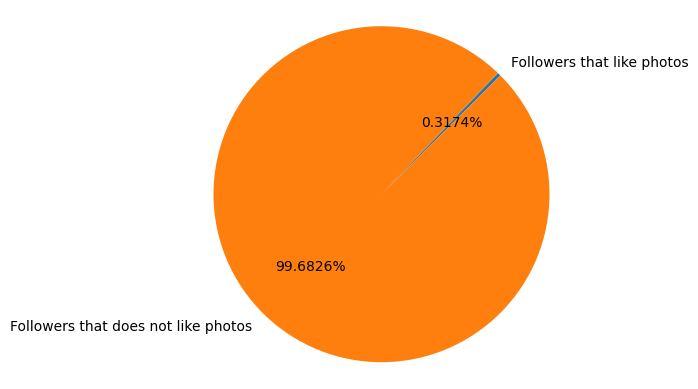

In [145]:
functions.plot_compared_to_followers(perc_photo_likers/100, 'photos','like')

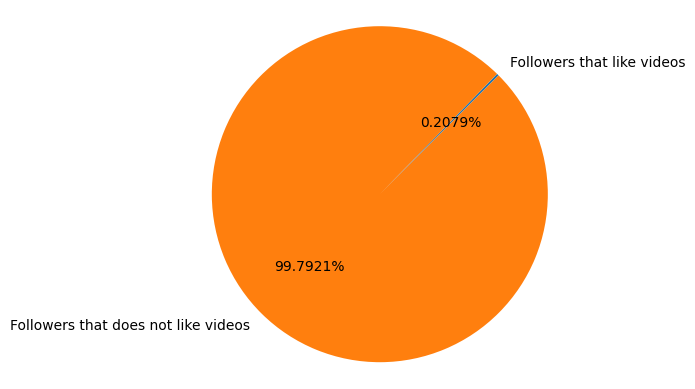

In [146]:
functions.plot_compared_to_followers(perc_video_likers/100, 'videos','like')

As we can see, when we talk about comments, the situation becomes even more extreme. In fact, the number of comments that are usually made, if compared to the number of followers, does not even reach 1%.

In [147]:
photo_comments_avg = int(round(comments_by_type['1'] / post_type_counter['1'], 0))
videos_comments_avg = int(round(comments_by_type['2'] / post_type_counter['2'], 0))

print('On average, post containing only photos get {} likes.'.format(photo_comments_avg))
print('On average, post containing only videos get {} likes.'.format(videos_comments_avg))

perc_photo_comm = round(100*photo_comments_avg/inf_followers, 4)
perc_video_comm = round(100*videos_comments_avg/inf_followers, 4)

print('On average, {}% of the followers likes post containing only photos.'.format(perc_photo_comm))
print('On average, {}% of the followers likes post containing only video.'.format(perc_video_comm))

On average, post containing only photos get 6703 likes.
On average, post containing only videos get 5749 likes.
On average, 0.0023% of the followers likes post containing only photos.
On average, 0.002% of the followers likes post containing only video.


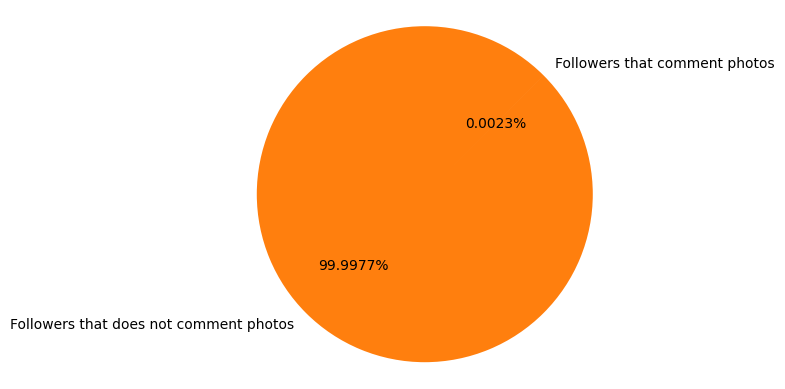

In [148]:
functions.plot_compared_to_followers(perc_photo_comm/100, 'photos','comment')

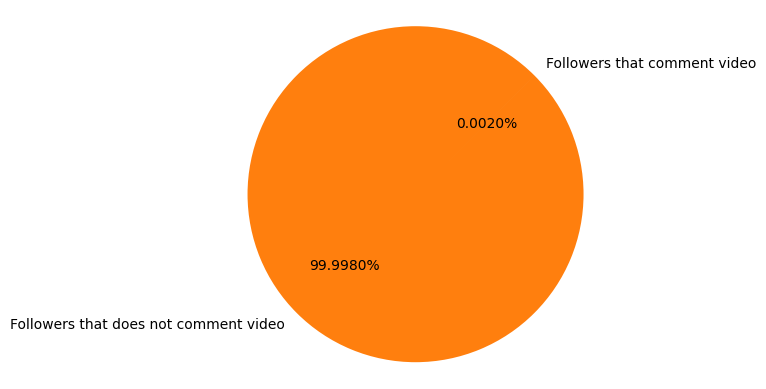

In [149]:
functions.plot_compared_to_followers(perc_video_comm/100, 'video','comment')

## [RQ6]  *User posting effectiveness analysis*